In [4]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.2-cp39-cp39-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import pandas as pd
import sys
import tensorflow as tf
import re

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.tokenize import word_tokenize

In [6]:
mpg = pd.read_csv('mpg.csv')

In [7]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [9]:
mpg[mpg['trans'].str.contains('m5')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact
51,dodge,dakota pickup 4wd,3.9,1999,6,manual(m5),4,14,17,r,pickup
55,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup
78,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
84,ford,f150 pickup 4wd,4.2,1999,6,manual(m5),4,14,17,r,pickup
85,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup


In [10]:
data = pd.read_csv('spam.csv')

In [11]:
data = data[['target','text']]

In [12]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [13]:
for i in data.text:
    print(i)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

In [25]:
import string

In [26]:
def rev_punc(x): # .이랑 물음표 삭제
    new_string = []
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string

- apply 함수를 사용해야 한다!
- apply를 사용해야지만 모든 데이터프레임의 값이 함수가 적용이 된다!

In [27]:
data['text'] = data['text'].apply(rev_punc)

In [28]:
for i in data.text:
    print(i)

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
Ok lar Joking wif u oni
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
U dun say so early hor U c already then say
Nah I dont think he goes to usf he lives around here though
FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send £150 to rcv
Even my brother is not like to speak with me They treat me like aids patent
As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers Press 9 to copy your friends Callertune
WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only
Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camer

... 같은 특수문자 날라가고 전처리됨, 문자중 나에게 필요없는 내용 뺄때

- 문장의 길이와 단어의 길이를 비교해 보자

In [29]:
tk_sp = [r.split() for r in data['text']] # 반복문을 사용해서 스플릿(토큰화로 나눔)

In [30]:
tk_sp[0]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [31]:
len(tk_sp[0])

20

In [32]:
#토큰화된 길이는 ?
tk_sp_len = [len(t) for t in tk_sp]

In [33]:
tk_sp_len

[20,
 6,
 28,
 11,
 13,
 32,
 16,
 26,
 26,
 29,
 21,
 26,
 26,
 37,
 8,
 19,
 4,
 19,
 13,
 23,
 8,
 11,
 11,
 20,
 11,
 28,
 5,
 28,
 15,
 12,
 26,
 41,
 6,
 17,
 29,
 28,
 9,
 8,
 4,
 30,
 17,
 28,
 29,
 4,
 13,
 3,
 8,
 5,
 14,
 30,
 12,
 22,
 16,
 55,
 22,
 12,
 27,
 6,
 4,
 7,
 23,
 9,
 6,
 12,
 24,
 28,
 23,
 22,
 15,
 8,
 8,
 5,
 10,
 6,
 5,
 9,
 14,
 11,
 7,
 16,
 4,
 8,
 10,
 9,
 3,
 11,
 26,
 31,
 9,
 7,
 10,
 39,
 26,
 23,
 20,
 29,
 5,
 12,
 37,
 7,
 11,
 21,
 16,
 26,
 36,
 10,
 17,
 10,
 14,
 24,
 6,
 8,
 5,
 24,
 27,
 24,
 30,
 27,
 11,
 15,
 20,
 26,
 8,
 27,
 13,
 7,
 4,
 46,
 5,
 27,
 5,
 2,
 5,
 4,
 25,
 28,
 6,
 8,
 9,
 31,
 20,
 8,
 5,
 26,
 10,
 7,
 10,
 29,
 15,
 6,
 6,
 9,
 15,
 4,
 26,
 80,
 5,
 5,
 32,
 19,
 27,
 24,
 13,
 19,
 24,
 30,
 10,
 27,
 13,
 13,
 10,
 10,
 20,
 6,
 20,
 11,
 14,
 6,
 27,
 16,
 25,
 31,
 6,
 13,
 5,
 4,
 26,
 7,
 24,
 13,
 19,
 10,
 38,
 6,
 22,
 19,
 7,
 6,
 14,
 29,
 7,
 5,
 18,
 23,
 3,
 7,
 13,
 30,
 5,
 13,
 8,
 14,
 6,
 2,
 5,

In [34]:
#전체 문장의 길이?
tk_t_sp_len = [len(s.replace(' ',""))for s in data['text']]

In [37]:
tk_t_sp_len # 공백지운 전체길이 83개

[83,
 18,
 122,
 33,
 47,
 108,
 60,
 129,
 126,
 124,
 83,
 103,
 122,
 156,
 26,
 120,
 17,
 58,
 43,
 124,
 33,
 37,
 36,
 66,
 45,
 110,
 25,
 97,
 54,
 49,
 101,
 141,
 23,
 67,
 128,
 89,
 36,
 21,
 18,
 119,
 63,
 94,
 135,
 15,
 48,
 26,
 36,
 25,
 52,
 112,
 45,
 89,
 64,
 221,
 94,
 57,
 122,
 26,
 19,
 31,
 81,
 38,
 20,
 43,
 85,
 122,
 92,
 128,
 59,
 26,
 30,
 24,
 35,
 31,
 13,
 33,
 58,
 37,
 29,
 57,
 17,
 22,
 23,
 28,
 11,
 40,
 92,
 110,
 33,
 30,
 46,
 151,
 114,
 113,
 85,
 122,
 26,
 39,
 134,
 25,
 44,
 59,
 58,
 129,
 140,
 35,
 77,
 32,
 68,
 86,
 22,
 32,
 25,
 69,
 126,
 105,
 112,
 118,
 56,
 66,
 122,
 125,
 43,
 128,
 38,
 30,
 15,
 190,
 17,
 77,
 19,
 6,
 32,
 21,
 96,
 127,
 29,
 26,
 37,
 120,
 54,
 24,
 21,
 122,
 31,
 19,
 38,
 124,
 67,
 25,
 22,
 34,
 44,
 16,
 129,
 289,
 23,
 19,
 117,
 104,
 116,
 91,
 47,
 62,
 116,
 120,
 41,
 125,
 59,
 52,
 45,
 39,
 62,
 26,
 78,
 44,
 51,
 20,
 102,
 50,
 97,
 126,
 16,
 51,
 18,
 22,
 114,
 27,
 122,
 42

In [36]:
len(data['text'][0])#전체길이

102

In [38]:
import matplotlib.pyplot as plt

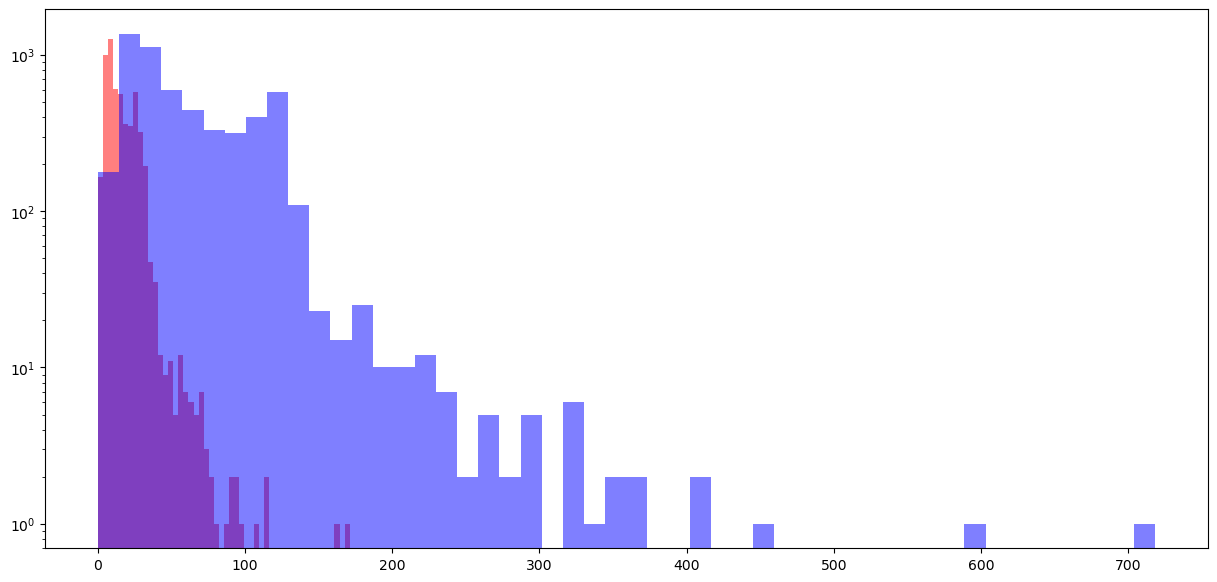

In [39]:
plt.figure(figsize=(15,7))
plt.hist(tk_sp_len, bins=50, alpha=0.5, color='r',label='word') # 토큰화된 길이
plt.hist(tk_t_sp_len, bins=50, alpha=0.5, color='b',label='alphabet') # 알파벳 길이
plt.yscale('log')

# 토큰화

In [40]:
data['text']

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [41]:
tk_sp[0]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

- 불용어 stopwords 의미없는 말들, 이런 불용어처리를 진행할 수 있다.

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\김지웅\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
english_stops=set(stopwords.words('english'))

In [45]:
english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [46]:
#반복문을 통한 정규화

sp_list=list(data.text)

In [47]:
sp_list

['Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s',
 'U dun say so early hor U c already then say',
 'Nah I dont think he goes to usf he lives around here though',
 'FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send £150 to rcv',
 'Even my brother is not like to speak with me They treat me like aids patent',
 'As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers Press 9 to copy your friends Callertune',
 'WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only',
 'Had your mobile 11 months or more U R entitled to Update t

sub함수 - 대체
반복문을 통해 영어, 숫자, 공백 다 제거

In [48]:
#정규화를 진행해 보자!
#영어와 숫자만 남기고 다 지우자!

list_reg = []

for i in data.text:
    text = re.sub('[^a-zA-Z0-9]',' ',i).strip() # 영어, 숫자, 공백 제거
    
    # 리스트에서 비어 있는것 제거
    if(text !=''):
        list_reg.append(text)

In [49]:
list_reg

['Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s',
 'U dun say so early hor U c already then say',
 'Nah I dont think he goes to usf he lives around here though',
 'FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send  150 to rcv',
 'Even my brother is not like to speak with me They treat me like aids patent',
 'As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers Press 9 to copy your friends Callertune',
 'WINNER As a valued network customer you have been selected to receivea  900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only',
 'Had your mobile 11 months or more U R entitled to Update t

- 불용어 제거하기

In [50]:
res_spam = [word for word in list_reg if word not in english_stops]

- 태깅
- 품사 태깅하는법, 명사, 형용사, 동사 태깅하는 법!

In [51]:
#토크나이저
token_spam=word_tokenize(str(list_reg))

In [52]:
res_spam = [word for word in token_spam if word not in english_stops]

In [54]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\김지웅\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [55]:
my_tag_set = ['NN','VB','VBD','JJ']
my_word = [word for word, tag in nltk.pos_tag(token_spam) if tag in my_tag_set]

In [56]:
#반복문을 통해서 해당 값들에 대한 카운팅도 할 수 있다.

spam_cntw = dict()
for word in my_word:
    spam_cntw[word] = spam_cntw.get(word, 0)+1

In [57]:
spam_cntw

{'[': 1,
 'jurong': 1,
 'point': 12,
 'crazy': 12,
 'bugis': 4,
 'great': 85,
 'world': 20,
 'la': 6,
 'buffet': 2,
 'got': 205,
 'wat': 53,
 'lar': 38,
 'wif': 17,
 'u': 715,
 'oni': 4,
 'entry': 25,
 'wkly': 9,
 'comp': 10,
 'win': 26,
 'final': 13,
 'tkts': 4,
 'receive': 35,
 'questionstd': 2,
 'txt': 66,
 'rateTCs': 2,
 'early': 22,
 'hor': 2,
 'c': 37,
 'say': 34,
 'think': 37,
 'usf': 9,
 'word': 34,
 'fun': 29,
 'ok': 94,
 'std': 9,
 'chgs': 1,
 'send': 126,
 'rcv': 2,
 'brother': 15,
 'speak': 14,
 'patent': 1,
 'request': 8,
 'callertune': 5,
 'copy': 9,
 'network': 25,
 'customer': 43,
 'receivea': 2,
 'prize': 73,
 'reward': 8,
 'claim': 78,
 'call': 371,
 'code': 13,
 "'Had": 8,
 'mobile': 97,
 'U': 2,
 'entitled': 2,
 'Update': 2,
 'colour': 17,
 'camera': 21,
 'gon': 39,
 'be': 369,
 'i': 616,
 'dont': 86,
 'talk': 32,
 'stuff': 41,
 'tonight': 55,
 'cried': 1,
 'today': 112,
 'info': 9,
 'week': 111,
 'membership': 3,
 'wwwdbuknet': 2,
 'right': 46,
 'thank': 8,
 'breat

- 우리가 정리한 카운팅 값에 대해서 시각화를 진행해 보자!
- 워드클라우도 보자!

- 워드클라우드 진행하다가 에러나는 경우
- 버전 호환으로 문제가 된다.
- pip install wordcloud
- 워드클라우드를 가지고 와도 시각화하면 에러 나는 경우는 python 버전 문제
- 자신의 파이썬 버전이 몇인지 확인하고 최소 3.8 이상 버전은 에러가 나지 않음

In [58]:
wc = WordCloud(width =400, height= 400, scale = 2.0, max_font_size =200, background_color='white')

In [59]:
wc

- 워드클라우 불러오는 방법이
- 그냥 불러오는 방법과 카운팅 기반으로 빈도 불러오는 방법이 있다.
- 이 빈도를 가지고 시각화를 해볼 것

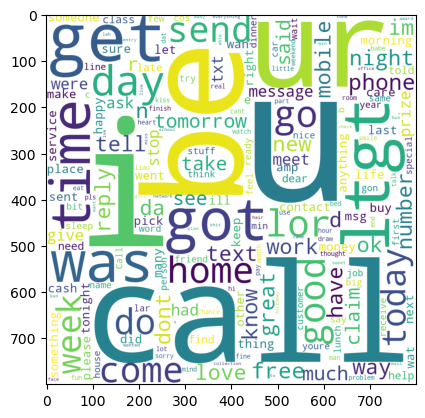

In [60]:
wc.generate_from_frequencies(spam_cntw)
plt.figure()
plt.imshow(wc)